In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file_path = '/content/gdrive/MyDrive/finalised_dataset.csv'
df=pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.shape

(12628, 16)

In [8]:
df['crop_names'].value_counts()

Maize                      1056
Sunflower                   960
Jowar                       875
Groundnut                   869
Sesamum                     673
Rice                        654
Moong(Green Gram)           573
Arhar/Tur                   570
Urad                        550
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       386
Rapeseed &Mustard           367
Other Kharif pulses         342
Safflower                   339
Niger seed                  323
Other  Rabi pulses          306
Castor seed                 296
Linseed                     281
Small millets               210
Ragi                        206
Other Cereals & Millets      86
other oilseeds               43
Mango                        31
Tomato                       30
Total foodgrain              29
Pulses total                 29
Banana                       28
Onion   

some crops have far too less entries for the model to learn meaningful relationships from , so i will remove crop types that have very few entries

i will first visualize the rare case crops that account for less than 1% of the entries

In [10]:
crop_distribution = df['crop_names'].value_counts(normalize=True) * 100
rare_crop_types = crop_distribution[crop_distribution < 1]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

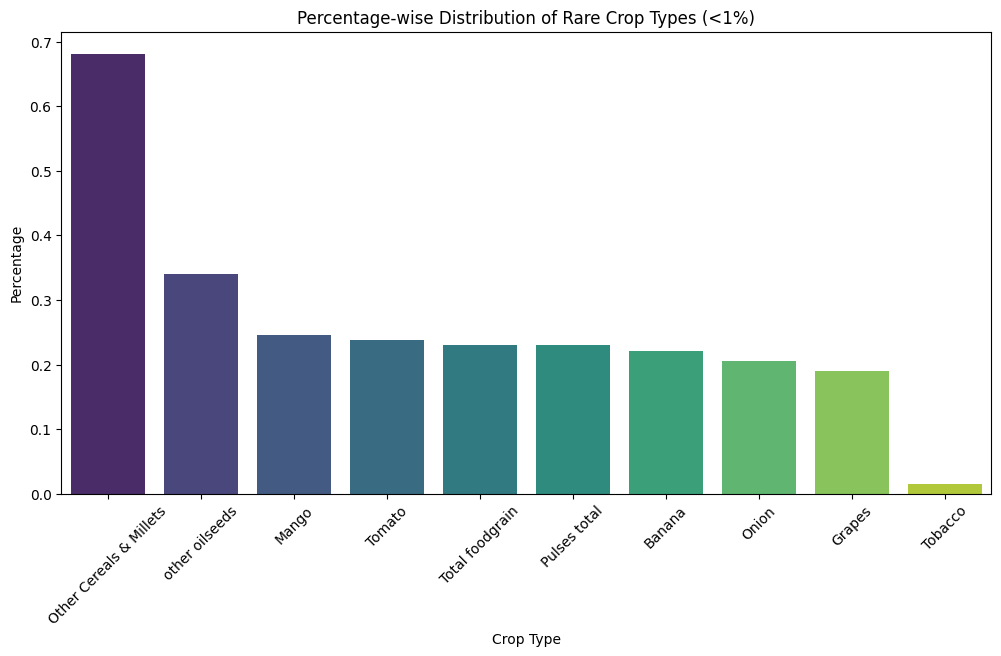

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rare_crop_types.index, y=rare_crop_types.values, palette='viridis')
plt.title('Percentage-wise Distribution of Rare Crop Types (<1%)')
plt.xlabel('Crop Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

cereals seem to have significantly more entries than the others so ill leave them as is and remove the others from the data set

In [13]:
crop_for_removal=crop_distribution[crop_distribution < 0.5]

In [15]:
mask = df['crop_names'].isin(crop_for_removal.index)
df1 = df[~mask]

In [17]:
df1['crop_names'].value_counts()

Maize                      1056
Sunflower                   960
Jowar                       875
Groundnut                   869
Sesamum                     673
Rice                        654
Moong(Green Gram)           573
Arhar/Tur                   570
Urad                        550
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       386
Rapeseed &Mustard           367
Other Kharif pulses         342
Safflower                   339
Niger seed                  323
Other  Rabi pulses          306
Castor seed                 296
Linseed                     281
Small millets               210
Ragi                        206
Other Cereals & Millets      86
Name: crop_names, dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12386 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_names     12386 non-null  object 
 1   district_names  12386 non-null  object 
 2   crop_year       12386 non-null  int64  
 3   season_names    12386 non-null  object 
 4   crop_names      12386 non-null  object 
 5   area            12386 non-null  float64
 6   temperature     12386 non-null  float64
 7   wind_speed      12386 non-null  float64
 8   pressure        12386 non-null  float64
 9   humidity        12386 non-null  float64
 10  soil_type       12386 non-null  object 
 11  N               12386 non-null  float64
 12  P               12386 non-null  float64
 13  K               12386 non-null  float64
 14  production      12259 non-null  float64
 15  Yield           12259 non-null  float64
dtypes: float64(10), int64(1), object(5)
memory usage: 1.6+ MB


In [19]:
df1 = df1.drop(df1[df1['production'].isnull()].index)
df1 = df1.drop(df1[df1['Yield'].isnull()].index)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12259 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_names     12259 non-null  object 
 1   district_names  12259 non-null  object 
 2   crop_year       12259 non-null  int64  
 3   season_names    12259 non-null  object 
 4   crop_names      12259 non-null  object 
 5   area            12259 non-null  float64
 6   temperature     12259 non-null  float64
 7   wind_speed      12259 non-null  float64
 8   pressure        12259 non-null  float64
 9   humidity        12259 non-null  float64
 10  soil_type       12259 non-null  object 
 11  N               12259 non-null  float64
 12  P               12259 non-null  float64
 13  K               12259 non-null  float64
 14  production      12259 non-null  float64
 15  Yield           12259 non-null  float64
dtypes: float64(10), int64(1), object(5)
memory usage: 1.6+ MB


In [21]:
df1.isnull().sum()

state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
pressure          0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
Yield             0
dtype: int64

In [22]:
df1['soil_type'].unique()

array(['loamy', 'sandy', 'clay', 'chalky', 'peaty', 'silty', 'silt'],
      dtype=object)

In [23]:
df1['soil_type'].value_counts()

clay      1794
loamy     1782
chalky    1766
silty     1764
sandy     1726
silt      1723
peaty     1704
Name: soil_type, dtype: int64

In [25]:
df1['season_names'].value_counts()

Kharif         7104
Rabi           3767
Summer         1010
Whole Year      371
Autumn            7
Name: season_names, dtype: int64

In [26]:
df = df1[df1['season_names'] != 'Autumn']

In [27]:
df['district_names'].value_counts()

PUNE          480
AHMEDNAGAR    479
SATARA        467
LATUR         457
PARBHANI      456
BEED          454
OSMANABAD     452
NANDED        448
NASHIK        447
SOLAPUR       443
SANGLI        438
JALNA         418
AURANGABAD    415
DHULE         408
KOLHAPUR      397
BULDHANA      392
JALGAON       392
AMRAVATI      387
NAGPUR        378
HINGOLI       370
NANDURBAR     369
YAVATMAL      344
AKOLA         343
CHANDRAPUR    319
WARDHA        316
GADCHIROLI    296
WASHIM        296
BHANDARA      281
THANE         261
RAIGAD        225
GONDIA        222
RATNAGIRI     204
SINDHUDURG    194
PALGHAR        10
MUMBAI          1
Name: district_names, dtype: int64

In [29]:
df = df[~df['district_names'].isin(['PALGHAR', 'MUMBAI'])]

In [30]:
df['district_names'].value_counts()

PUNE          480
AHMEDNAGAR    479
SATARA        467
LATUR         457
PARBHANI      456
BEED          454
OSMANABAD     452
NANDED        448
NASHIK        447
SOLAPUR       443
SANGLI        438
JALNA         418
AURANGABAD    415
DHULE         408
KOLHAPUR      397
BULDHANA      392
JALGAON       392
AMRAVATI      387
NAGPUR        378
HINGOLI       370
NANDURBAR     369
YAVATMAL      344
AKOLA         343
CHANDRAPUR    319
WARDHA        316
GADCHIROLI    296
WASHIM        296
BHANDARA      281
THANE         261
RAIGAD        225
GONDIA        222
RATNAGIRI     204
SINDHUDURG    194
Name: district_names, dtype: int64

In [34]:
df.shape

(12248, 16)

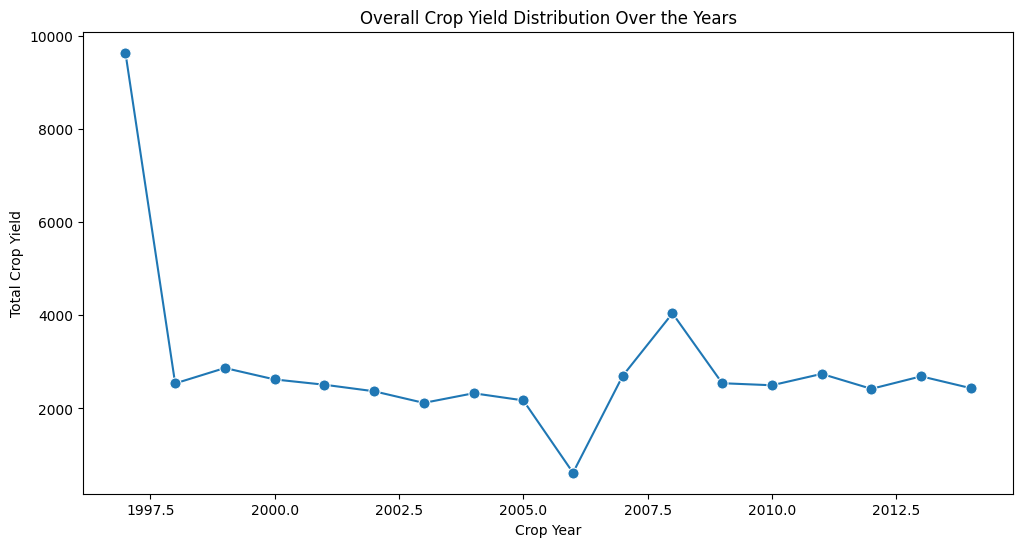

In [36]:
total_yield_by_year = df.groupby('crop_year')['Yield'].sum().reset_index()

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_yield_by_year, x='crop_year', y='Yield', marker='o', markersize=8)
plt.title('Overall Crop Yield Distribution Over the Years')
plt.xlabel('Crop Year')
plt.ylabel('Total Crop Yield')
plt.show()

In [37]:
df[df['crop_year'] == 1997]

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.00,1113.0,1113.000000
1,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.00,6300.0,0.357955
2,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.00,152800.0,0.557461
3,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.25,18600.0,0.455882
4,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.00,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Maharashtra,YAVATMAL,1997,Kharif,Rice,6700.0,21.383259,2.028293,1015.636881,20.639268,clay,3.450,3.450,0.00,3800.0,0.567164
12280,Maharashtra,YAVATMAL,1997,Kharif,Urad,23300.0,20.870756,2.031675,1015.070745,20.853312,chalky,902.566,0.000,0.00,5600.0,0.240343
12281,Maharashtra,YAVATMAL,1997,Rabi,Other Rabi pulses,110.0,20.136405,2.072031,1014.735334,20.839787,peaty,6.516,16.652,0.00,6.0,0.054545
12282,Maharashtra,YAVATMAL,1997,Rabi,Wheat,18600.0,22.022925,2.086162,1013.619170,20.994452,clay,59.220,0.000,0.00,8700.0,0.467742


first entry that only has an area of 1 is causing a spike in the yeild value , so must be removed

In [40]:
df=df.drop(0)

In [42]:
min_yield = df['Yield'].min()
max_yield = df['Yield'].max()

# Display the minimum and maximum values
print(f"Minimum Yield: {min_yield}")
print(f"Maximum Yield: {max_yield}")

Minimum Yield: 0.0
Maximum Yield: 1494.0


the discrepancy in yeild could be because of some farm lands that are extremely small in comparison to others leading to very high yield values

In [44]:
# Calculate z-scores for 'area'
z_scores_area = np.abs((df['area'] - df['area'].mean()) / df['area'].std())

# Define a threshold for z-scores (e.g., 3)
threshold_area = 3

# Identify rows with 'area' z-scores exceeding the threshold
outliers_area = df[z_scores_area > threshold_area]

# Display or inspect the identified outliers in 'area'
print(outliers_area)


       state_names district_names  crop_year season_names    crop_names  \
2      Maharashtra     AHMEDNAGAR       1997  Kharif              Bajra   
13     Maharashtra     AHMEDNAGAR       1997  Rabi                Jowar   
20     Maharashtra     AHMEDNAGAR       1998  Kharif              Bajra   
38     Maharashtra     AHMEDNAGAR       1998  Rabi                Jowar   
52     Maharashtra     AHMEDNAGAR       1999  Kharif              Bajra   
...            ...            ...        ...          ...           ...   
12593  Maharashtra       YAVATMAL       2012  Kharif           Soyabean   
12603  Maharashtra       YAVATMAL       2013  Kharif       Cotton(lint)   
12608  Maharashtra       YAVATMAL       2013  Kharif           Soyabean   
12618  Maharashtra       YAVATMAL       2014  Kharif       Cotton(lint)   
12621  Maharashtra       YAVATMAL       2014  Kharif           Soyabean   

           area  temperature  wind_speed     pressure   humidity soil_type  \
2      274100.0    21

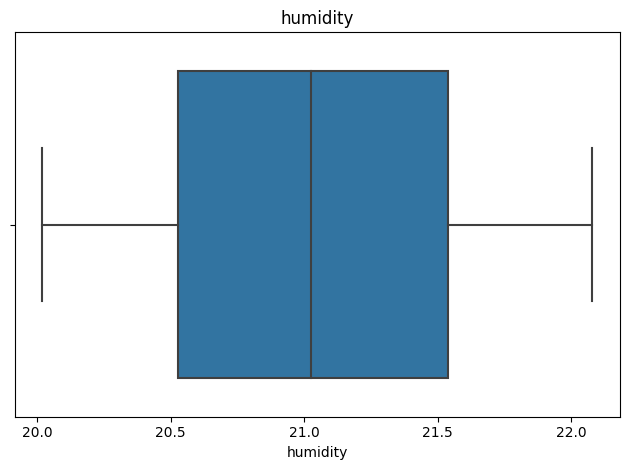

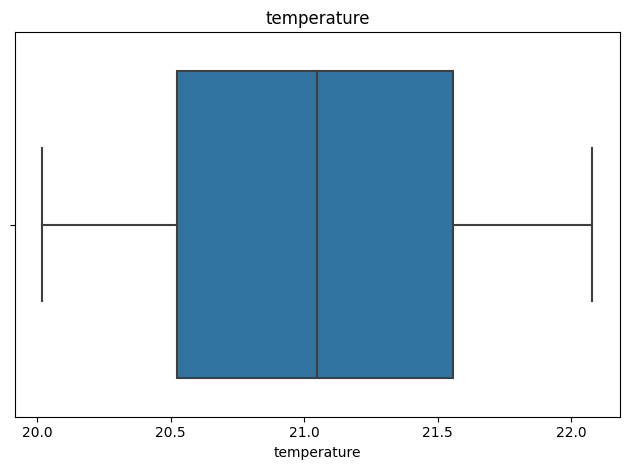

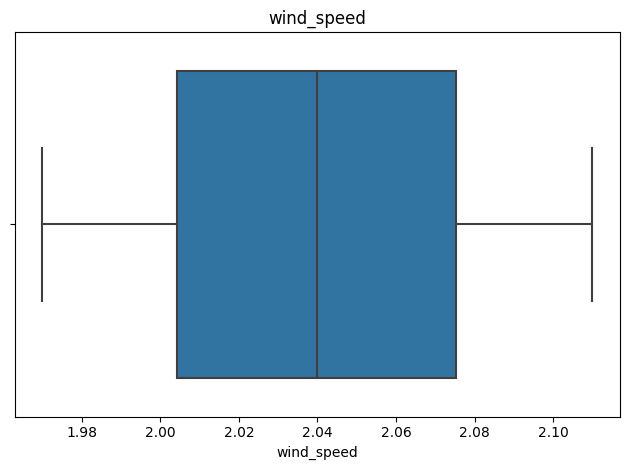

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name=['humidity','temperature','wind_speed']
for i in column_name:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.tight_layout()
    plt.show()

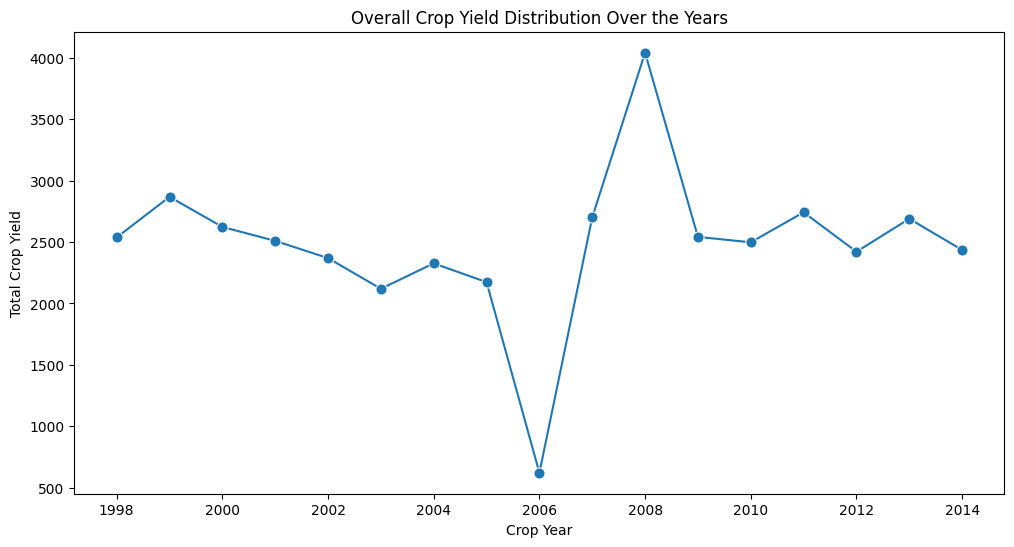

In [50]:
df2 = df.loc[df['crop_year'] != 1997]

total_yield_by_year = df2.groupby('crop_year')['Yield'].sum().reset_index()

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_yield_by_year, x='crop_year', y='Yield', marker='o', markersize=8)
plt.title('Overall Crop Yield Distribution Over the Years')
plt.xlabel('Crop Year')
plt.ylabel('Total Crop Yield')
plt.show()

taking data from 1998 onwards removed the massive drop in yield values

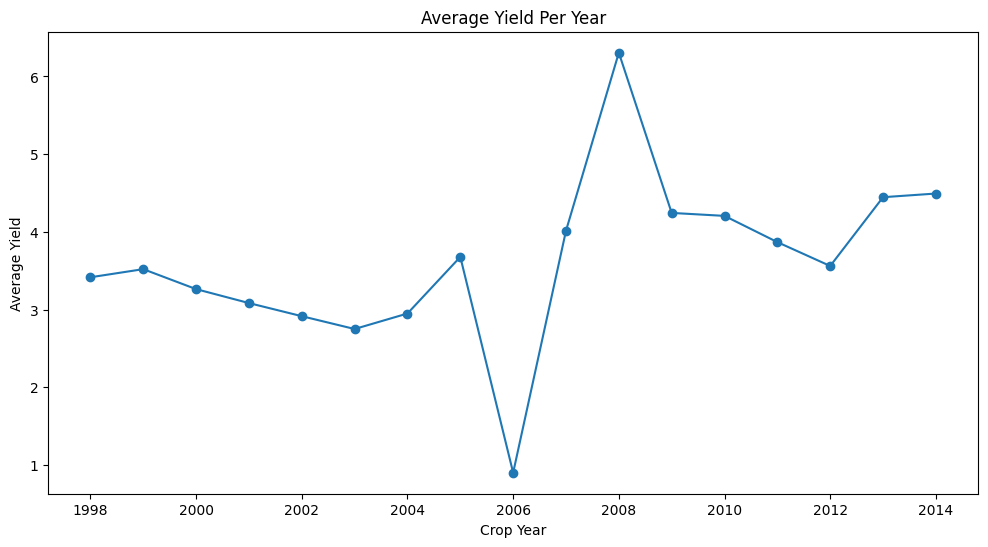

In [53]:
average_yield_per_year = df2.groupby('crop_year')['Yield'].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(average_yield_per_year['crop_year'], average_yield_per_year['Yield'], marker='o')
plt.title('Average Yield Per Year')
plt.xlabel('Crop Year')
plt.ylabel('Average Yield')
plt.show()

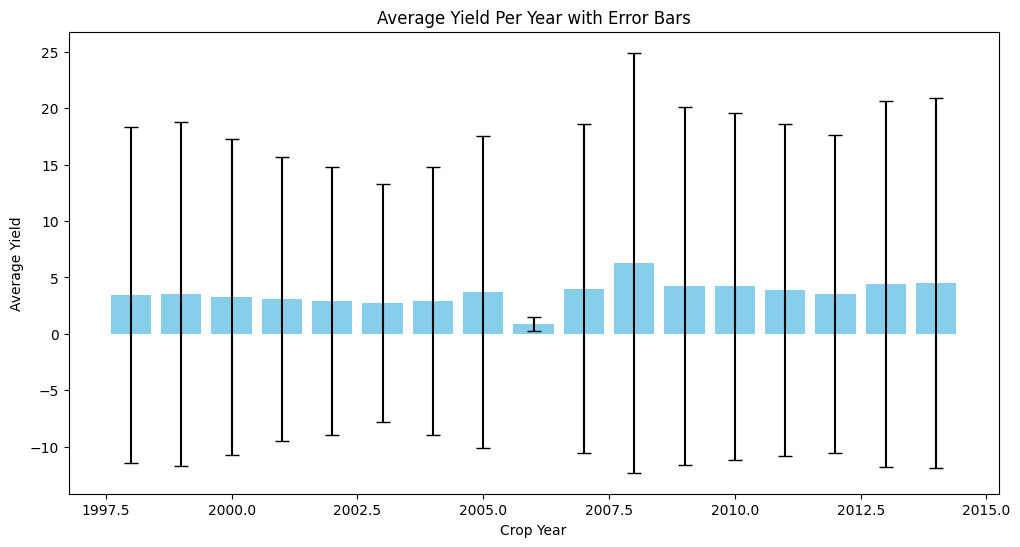

In [55]:
average_yield_per_year = df2.groupby('crop_year')['Yield'].mean().reset_index()
std_dev_yield_per_year = df2.groupby('crop_year')['Yield'].std().reset_index()

# Plot the bar plot with error bars
plt.figure(figsize=(12, 6))
plt.bar(average_yield_per_year['crop_year'], average_yield_per_year['Yield'], yerr=std_dev_yield_per_year['Yield'], capsize=5, color='skyblue')
plt.title('Average Yield Per Year with Error Bars')
plt.xlabel('Crop Year')
plt.ylabel('Average Yield')
plt.show()

In [57]:
df2['crop_year'].value_counts()

1999    815
2001    814
2002    813
2000    804
2004    789
2003    771
1998    743
2011    709
2006    691
2012    680
2007    673
2008    641
2013    605
2009    599
2010    594
2005    591
2014    542
Name: crop_year, dtype: int64

there was a drought in 2006 which could explain the drop in yield that year , so to make the distribution more uniform i will drop 2006 from the dataset

In [65]:
rice_data = df[(df['crop_names'] == 'Maize') & ((df['crop_year'] == 2005) | (df['crop_year'] == 2006))]

# Calculate the average yield for each year
average_yield_per_year = rice_data.groupby('crop_year')['Yield'].mean()

# Display the average yield for each year
print(average_yield_per_year)

crop_year
2006    1.694981
Name: Yield, dtype: float64


In [67]:
df[df['crop_year']==2006].describe().T

,count,mean,std,min,25%,50%,75%,max
crop_year,691.0,2006.000000,0.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000
area,691.0,28956.439942,63143.633583,100.000000,600.000000,4600.000000,30950.000000,711300.000000
temperature,691.0,21.069409,0.590992,20.027005,20.550650,21.106113,21.564002,22.079732
wind_speed,691.0,2.039888,0.039579,1.970342,2.006445,2.037066,2.074381,2.109896
pressure,691.0,1014.473530,0.860256,1013.001256,1013.743129,1014.434226,1015.218578,1015.982055
humidity,691.0,21.066096,0.589451,20.022418,20.565929,21.086883,21.567656,22.079981
N,691.0,69.361686,217.782441,0.000000,0.825000,4.531000,19.696000,928.372000
P,691.0,14.030237,24.556390,0.000000,0.000000,3.990000,16.820000,111.200000
K,691.0,6.681281,14.749023,0.000000,0.000000,0.000000,1.596000,55.600000
production,691.0,30501.632417,72830.365163,20.000000,300.000000,3000.000000,24200.000000,804200.000000


In [68]:
df[df['crop_year']==2008].describe().T

,count,mean,std,min,25%,50%,75%,max
crop_year,641.0,2008.000000,0.000000e+00,2008.000000,2008.000000,2008.000000,2008.000000,2.008000e+03
area,641.0,30236.129485,6.517419e+04,1.000000,600.000000,5700.000000,32000.000000,6.875000e+05
temperature,641.0,21.045743,5.880474e-01,20.023096,20.579311,21.053889,21.544066,2.207633e+01
wind_speed,641.0,2.037185,4.123878e-02,1.970018,2.000275,2.035414,2.073507,2.109799e+00
pressure,641.0,1014.492047,8.740119e-01,1013.001348,1013.759254,1014.457203,1015.262391,1.015997e+03
humidity,641.0,21.051115,5.977871e-01,20.021667,20.565882,21.034540,21.592320,2.207355e+01
N,641.0,60.573117,2.008646e+02,0.000000,0.224000,4.000000,10.500000,9.283720e+02
P,641.0,12.985296,2.365521e+01,0.000000,0.000000,3.496000,15.712000,1.112000e+02
K,641.0,6.099674,1.395421e+01,0.000000,0.000000,0.000000,1.501000,5.560000e+01
production,641.0,216815.496100,1.034384e+06,3.000000,266.000000,3300.000000,34900.000000,9.954400e+06


could be low areas causing irregular yields , so we must identify and remove outliers in area

In [69]:
df2.shape

(11874, 16)

In [84]:
q1=df2['Yield'].quantile(0.25)
q3=df2['Yield'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
lowerlimit,upperlimit

outliers=[]
outliers=df2.loc[(df2['Yield']>upperlimit) | (df2['Yield']<lowerlimit)].index
print(outliers)

Int64Index([   34,    82,   112,   144,   175,   210,   243,   255,   299,
              319,
            ...
            12533, 12538, 12549, 12558, 12562, 12573, 12583, 12600, 12614,
            12627],
           dtype='int64', length=899)


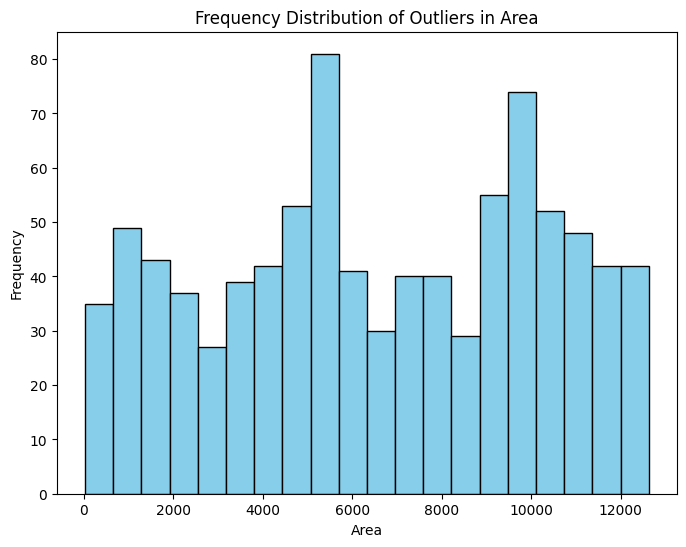

In [86]:
plt.figure(figsize=(8, 6))
plt.hist(outliers, bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Outliers in Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

In [112]:
df2.shape

(11874, 16)

In [321]:
Q1 = df2['Yield'].quantile(0.25)
Q3 = df2['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers = df2[(df2['Yield'] < (Q1 - 1.5 * IQR)) | (df2['Yield'] > (Q3 + 1.3 * IQR))]

# Remove outliers from 'Yield'
df_no_outliers = df2[(df2['Yield'] >= (Q1 - 0.5*IQR)) & (df2['Yield'] <= (Q3 + 40 * IQR))]

# Display the DataFrame without outliers
# print(df_no_outliers)

df3=df_no_outliers
df3['Yield']

min_yield = df3['Yield'].min()
max_yield = df3['Yield'].max()

print(f"Minimum Yield: {min_yield}")
print(f"Maximum Yield: {max_yield}")

Minimum Yield: 0.02
Maximum Yield: 29.0


In [322]:

df=df3
df = df.join(pd.get_dummies(df['district_names']))
df = df.join(pd.get_dummies(df['season_names']))
df = df.join(pd.get_dummies(df['crop_names']))
df = df.join(pd.get_dummies(df['state_names']))
df = df.join(pd.get_dummies(df['soil_type']))


In [323]:
df = df.drop('production', axis=1)
df=df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('crop_names',axis=1)
df = df.drop('state_names', axis=1)
df = df.drop('soil_type', axis=1)
df=df.drop('area',axis=1)
df

,crop_year,temperature,wind_speed,pressure,humidity,N,P,K,Yield,AHMEDNAGAR,...,Urad,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty
19,1998,20.692897,2.087618,1014.739862,21.949998,38.250,38.250,38.250,0.515957,1,...,0,0,1,0,0,0,0,0,0,1
20,1998,20.988835,2.077557,1014.940241,20.615412,0.000,26.832,0.000,0.806548,1,...,0,0,1,0,1,0,0,0,0,0
21,1998,20.831845,1.995049,1014.654889,21.513582,10.240,26.624,26.624,0.250000,1,...,0,0,1,0,0,0,0,0,1,0
22,1998,21.721036,2.028015,1013.713074,20.732730,41.496,110.656,55.328,1.644628,1,...,0,0,1,1,0,0,0,0,0,0
23,1998,20.124897,2.070208,1014.856644,21.395918,7.840,7.840,0.000,0.873239,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,2014,21.755582,2.014701,1015.121154,20.091311,41.496,110.656,55.328,0.846753,0,...,0,0,1,0,0,0,0,1,0,0
12623,2014,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,0.825000,0,...,0,0,1,0,0,0,0,0,0,1
12624,2014,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,0.153846,0,...,0,0,1,0,0,0,0,0,1,0
12625,2014,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,0.920962,0,...,0,1,1,0,0,0,0,1,0,0


In [324]:
from sklearn.model_selection import train_test_split
y = df['Yield']
X =df.drop('Yield', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [325]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=42, n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(y_test, y_pred))
print('MAE =', mae(y_test, y_pred))
print('R2 Score =', r2_score(y_test, y_pred))

MSE = 0.1191800151439523
MAE = 0.22622842816962002
R2 Score = 0.8602677409526314


In [312]:
import scipy.stats as stats
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [313]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor()
]

param_grid = [
    {},
    {'max_depth': [2,3, 5, 7,10]},
    {'n_estimators': [100]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.6600324822933932

DecisionTreeRegressor:
Best parameters: {'max_depth': 10}
Best R2 score: 0.6881579930841205



KeyboardInterrupt: ignored